In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("C:/Users/GANESH V/stock-price-prediction/data/RELIANCE_NS_stock_data.csv")
data

,Date,Close,High,Low,Open,Volume
0,NaN,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
1,2000-01-03,13.244407653808594,13.244407653808594,12.497205541988075,12.497205541988075,62409578
2,2000-01-04,14.304694175720215,14.304694175720215,13.223356674853315,13.596956983713564,132872110
3,2000-01-05,14.865094184875488,15.149241510026261,13.504871794917879,13.504871794917879,375789847
4,2000-01-06,15.48863697052002,15.82277380743757,15.20712224390229,15.20712224390229,219621124
...,...,...,...,...,...,...
6460,2025-11-24,1535.9000244140625,1550.0,1531.800048828125,1550.0,18433951
6461,2025-11-25,1539.699951171875,1559.5999755859375,1525.0999755859375,1535.9000244140625,15033482
6462,2025-11-26,1569.9000244140625,1571.5999755859375,1540.5,1542.300048828125,14054299
6463,2025-11-27,1563.4000244140625,1575.5,1556.0,1575.0,9794643


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6465 entries, 0 to 6464
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    6464 non-null   object
 1   Close   6465 non-null   object
 2   High    6465 non-null   object
 3   Low     6465 non-null   object
 4   Open    6465 non-null   object
 5   Volume  6465 non-null   object
dtypes: object(6)
memory usage: 303.2+ KB
None


In [8]:
data["Date"] = pd.to_datetime(data["Date"], errors="coerce")
data = data.dropna(subset=["Date"])
data = data[data["Date"] >= "1995-01-01"]
data = data.sort_values("Date").reset_index(drop=True)


In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6464 entries, 0 to 6463
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6464 non-null   datetime64[ns]
 1   Close   6464 non-null   object        
 2   High    6464 non-null   object        
 3   Low     6464 non-null   object        
 4   Open    6464 non-null   object        
 5   Volume  6464 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 303.1+ KB
None


In [10]:
data

,Date,Close,High,Low,Open,Volume
0,2000-01-03,13.244407653808594,13.244407653808594,12.497205541988075,12.497205541988075,62409578
1,2000-01-04,14.304694175720215,14.304694175720215,13.223356674853315,13.596956983713564,132872110
2,2000-01-05,14.865094184875488,15.149241510026261,13.504871794917879,13.504871794917879,375789847
3,2000-01-06,15.48863697052002,15.82277380743757,15.20712224390229,15.20712224390229,219621124
4,2000-01-07,16.551557540893555,16.727835075094596,15.417600887396045,15.522840891648316,278281260
...,...,...,...,...,...,...
6459,2025-11-24,1535.9000244140625,1550.0,1531.800048828125,1550.0,18433951
6460,2025-11-25,1539.699951171875,1559.5999755859375,1525.0999755859375,1535.9000244140625,15033482
6461,2025-11-26,1569.9000244140625,1571.5999755859375,1540.5,1542.300048828125,14054299
6462,2025-11-27,1563.4000244140625,1575.5,1556.0,1575.0,9794643


In [11]:
for col in data.select_dtypes(include="object").columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

print(data)

           Date        Close         High          Low         Open     Volume
0    2000-01-03    13.244408    13.244408    12.497206    12.497206   62409578
1    2000-01-04    14.304694    14.304694    13.223357    13.596957  132872110
2    2000-01-05    14.865094    15.149242    13.504872    13.504872  375789847
3    2000-01-06    15.488637    15.822774    15.207122    15.207122  219621124
4    2000-01-07    16.551558    16.727835    15.417601    15.522841  278281260
...         ...          ...          ...          ...          ...        ...
6459 2025-11-24  1535.900024  1550.000000  1531.800049  1550.000000   18433951
6460 2025-11-25  1539.699951  1559.599976  1525.099976  1535.900024   15033482
6461 2025-11-26  1569.900024  1571.599976  1540.500000  1542.300049   14054299
6462 2025-11-27  1563.400024  1575.500000  1556.000000  1575.000000    9794643
6463 2025-11-28  1567.500000  1581.300049  1563.000000  1568.000000    8959508

[6464 rows x 6 columns]


In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6464 entries, 0 to 6463
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6464 non-null   datetime64[ns]
 1   Close   6464 non-null   float64       
 2   High    6464 non-null   float64       
 3   Low     6464 non-null   float64       
 4   Open    6464 non-null   float64       
 5   Volume  6464 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 303.1 KB
None


In [13]:
print("Missing values in data :\n ",data.isnull().sum())

Missing values in data :
  Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [14]:
print(data.isnull().any())

Date      False
Close     False
High      False
Low       False
Open      False
Volume    False
dtype: bool


In [15]:
data = data.fillna(0)

In [16]:
print(data.isnull().any())

Date      False
Close     False
High      False
Low       False
Open      False
Volume    False
dtype: bool


In [17]:
print(data.describe())

                                Date        Close         High          Low  \
count                           6464  6464.000000  6464.000000  6464.000000   
mean   2012-11-05 04:46:29.108910848   394.830778   399.328922   390.641336   
min              2000-01-03 00:00:00    10.692343    11.550046    10.373994   
25%              2006-04-06 12:00:00    82.261612    83.244808    81.112725   
50%              2012-10-20 12:00:00   204.521866   207.306341   201.811872   
75%              2019-05-21 06:00:00   559.517929   567.466668   553.946785   
max              2025-11-28 00:00:00  1589.138184  1596.980166  1573.851280   
std                              NaN   439.898349   443.973793   436.077061   

              Open        Volume  
count  6464.000000  6.464000e+03  
mean    395.108847  3.380232e+07  
min      10.813369  0.000000e+00  
25%      81.918847  1.262824e+07  
50%     204.662564  2.003772e+07  
75%     560.090432  3.998971e+07  
max    1592.662006  6.322896e+08  
std     

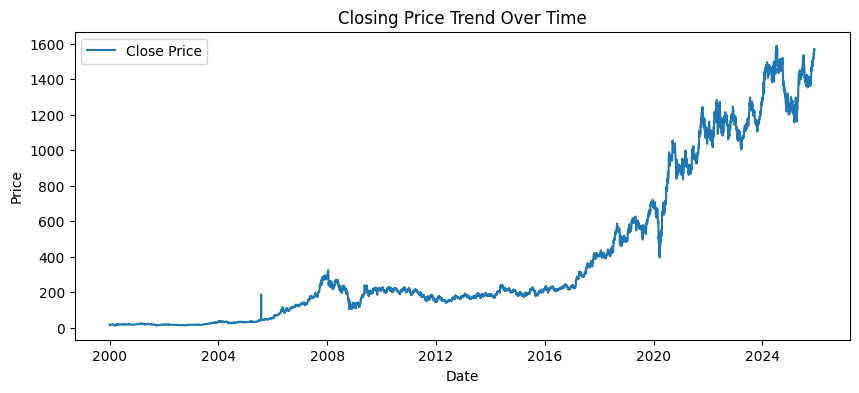

In [18]:
plt.figure(figsize=(10, 4))
plt.plot( data["Date"], data["Close"], label="Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Closing Price Trend Over Time")
plt.legend()
plt.show()

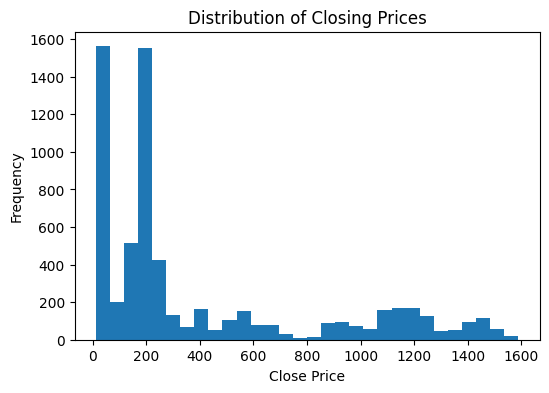

In [19]:
plt.figure(figsize=(6, 4))
plt.hist(data["Close"], bins=30)
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title("Distribution of Closing Prices")
plt.show()

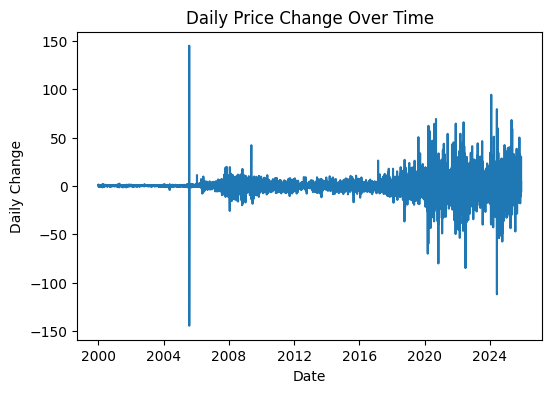

In [20]:
data["Daily_Change"] = data["Close"].diff()

plt.figure(figsize=(6, 4))
plt.plot(data["Date"], data["Daily_Change"])
plt.xlabel("Date")
plt.ylabel("Daily Change")
plt.title("Daily Price Change Over Time")
plt.show()

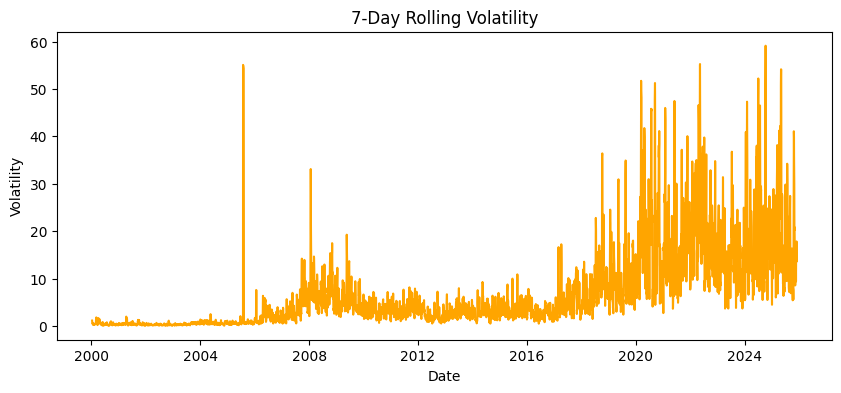

In [21]:
data["Rolling_Volatility"] = data["Close"].rolling(window=7).std()

plt.figure(figsize=(10, 4))
plt.plot(data["Date"], data["Rolling_Volatility"], color="orange")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("7-Day Rolling Volatility")
plt.show()

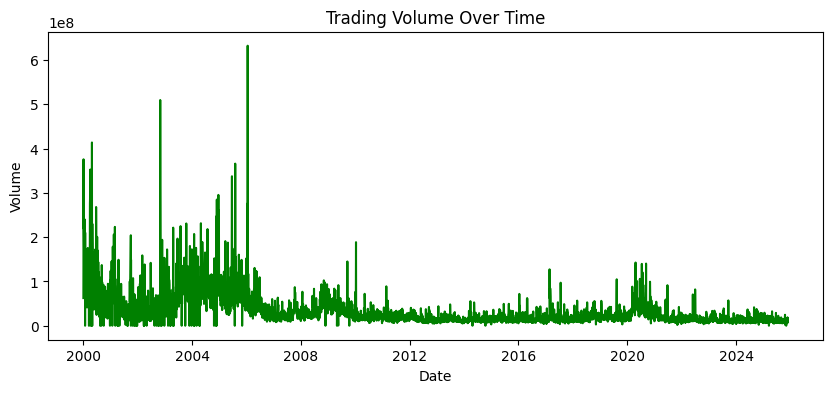

In [22]:
plt.figure(figsize=(10, 4))
plt.plot(data["Date"], data["Volume"], color="green")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Trading Volume Over Time")
plt.show()


In [23]:
corr = data[["Open", "High", "Low", "Close"]].corr()
print("\nCorrelation Matrix:")
print(corr)



Correlation Matrix:
           Open      High       Low     Close
Open   1.000000  0.999917  0.999908  0.999823
High   0.999917  1.000000  0.999885  0.999928
Low    0.999908  0.999885  1.000000  0.999923
Close  0.999823  0.999928  0.999923  1.000000


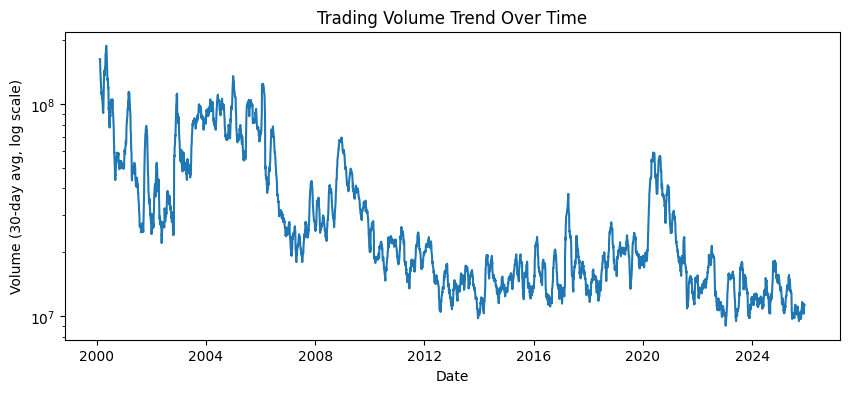

In [24]:
# Smooth volume using rolling average
data["Volume_MA"] = data["Volume"].rolling(window=30).mean()

plt.figure(figsize=(10, 4))
plt.plot(data["Date"], data["Volume_MA"])
plt.yscale("log")
plt.xlabel("Date")
plt.ylabel("Volume (30-day avg, log scale)")
plt.title("Trading Volume Trend Over Time")
plt.show()


In [25]:
print("Overall Dataset Statistics (Close Price):")
print(data['Close'].describe())

print("\nOverall Mean:", data['Close'].mean())
print("Overall Standard Deviation:", data['Close'].std())

Overall Dataset Statistics (Close Price):
count    6464.000000
mean      394.830778
std       439.898349
min        10.692343
25%        82.261612
50%       204.521866
75%       559.517929
max      1589.138184
Name: Close, dtype: float64

Overall Mean: 394.8307779704285
Overall Standard Deviation: 439.8983491271569


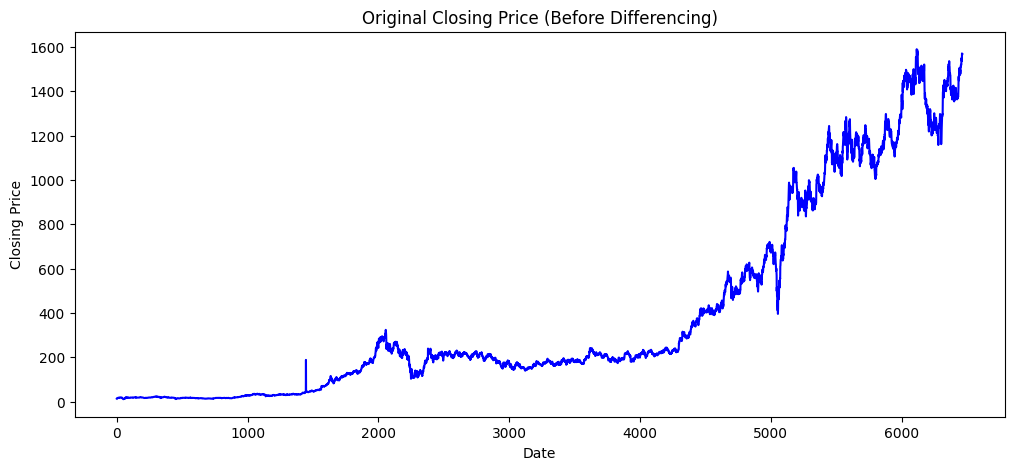

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(data['Close'], color='blue')
plt.title('Original Closing Price (Before Differencing)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


In [27]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data['Close'].dropna())

print("ADF (Augmented Dickey–Fuller test) Test Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")

for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

ADF (Augmented Dickey–Fuller test) Test Statistic: 1.1020022106193477
p-value: 0.99523367443943
Critical Values:
   1%: -3.431362678073597
   5%: -2.861987516467093
   10%: -2.567008209725963


In [28]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt


In [29]:
data['Close_Diff'] = data['Close'].diff()
diff_series = data['Close_Diff'].dropna()

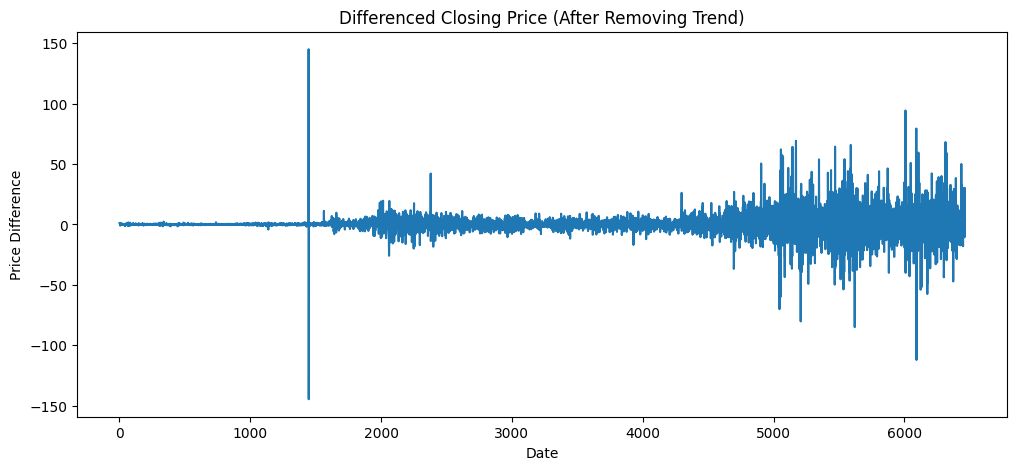

In [30]:
plt.figure(figsize=(12, 5))
plt.plot(diff_series)
plt.title('Differenced Closing Price (After Removing Trend)')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.show()

In [31]:
adf_result_diff = adfuller(diff_series)

print("ADF Test Result After Differencing")
print("----------------------------------")
print(f"ADF Statistic : {adf_result_diff[0]}")
print(f"p-value       : {adf_result_diff[1]}")
print("Critical Values:")

for key, value in adf_result_diff[4].items():
    print(f"   {key}: {value}")

ADF Test Result After Differencing
----------------------------------
ADF Statistic : -48.17374884008007
p-value       : 0.0
Critical Values:
   1%: -3.431362678073597
   5%: -2.861987516467093
   10%: -2.567008209725963
